In [96]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
from scipy import misc
from resizeimage import resizeimage
from scipy import ndimage
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


### Question 1&2

In [3]:
image=Image.open(r"lena.png")
image_array= np.array(image)

In [21]:
image_array=misc.imread('lena.png') # direkt array şeklinde çekiyor
image_array=np.array(resizeimage.resize_cover(Image.fromarray(image_array), [256, 256]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [90]:
def gausian_noise(image_array,sigma):
    
    
    row=image_array.shape[0]
    col=image_array.shape[1]
    ch=image_array.shape[2]
    #gauss = np.array(np.random.normal(mean,sigma[i],(row,col,ch)),dtype=np.int8)
    noise = np.array(np.random.normal(0,sigma,(row,col,ch)),dtype=np.int8)
    noisy = (image_array + noise).astype(np.uint8)
    
    return(noisy)


Sigma is 1


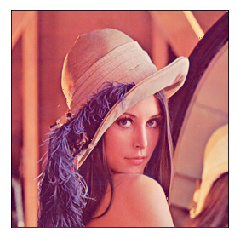

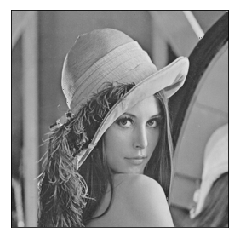

Sigma is 5


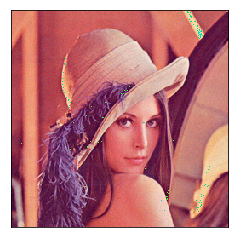

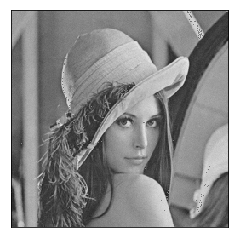

Sigma is 10


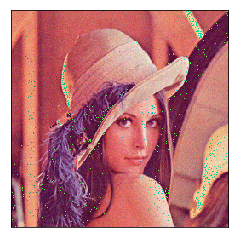

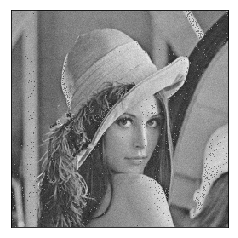

Sigma is 20


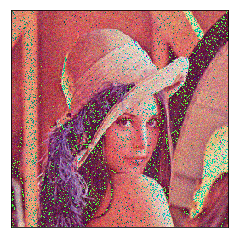

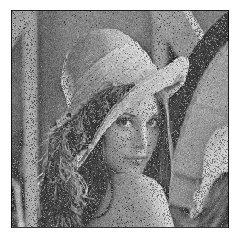

In [92]:
noisy_cs=[]

for i in [1,5,10,20]:
    noisy_array=gausian_noise(image_array,i)
    print("Sigma is",i)
    plt.subplot(111),plt.imshow(noisy_array)
    plt.xticks([]), plt.yticks([])
    plt.show()
    noisy_cs.append(noisy_array)
    array= np.array(noisy_array)
    array[:] = array.mean(axis=-1,keepdims=1)
    plt.subplot(111),plt.imshow(array)
    plt.xticks([]), plt.yticks([])
    plt.show()

### Question 3&4

In [103]:
low_pass1= np.array([[[1,1,1],[1,1,1],[1,1,1]]])/9
low_pass2= np.array([[[1, 1, 1, 1, 1],[1,  1,  1, 1, 1],[1,  1,  1, 1, 1],[1,  1,  1, 1, 1],[1, 1, 1, 1, 1]]])/25
low_pass3= np.array([[[1,2,1],[2,4,2],[1,2,1]]])

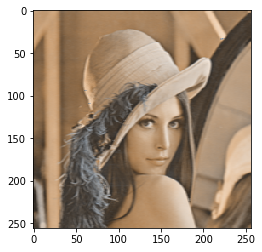

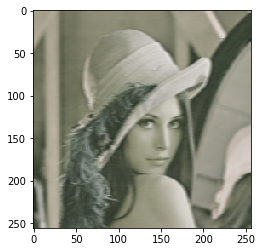

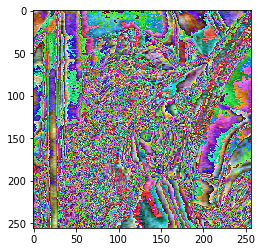

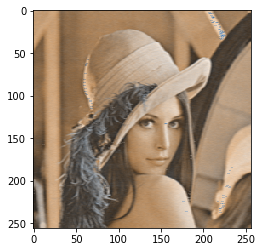

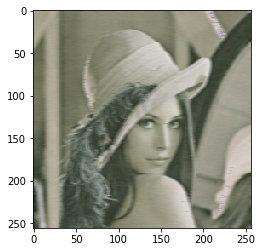

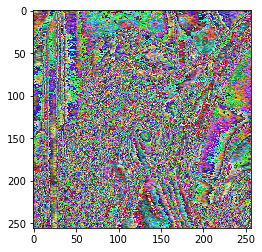

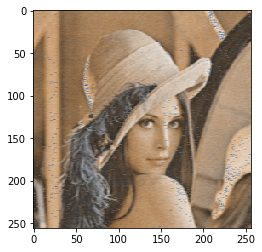

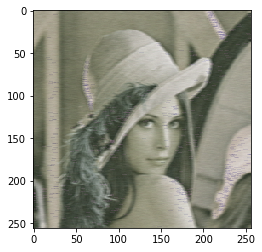

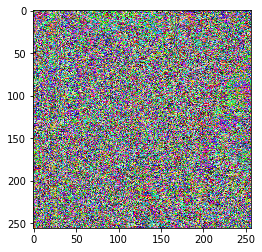

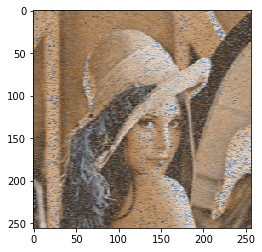

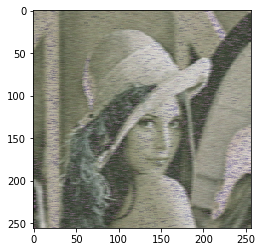

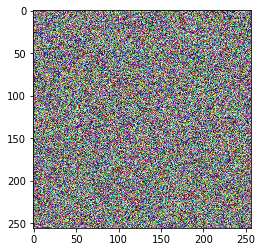

In [104]:
for y in noisy_cs:
    for x in (low_pass1,low_pass2,low_pass3):
        #data = np.array(y, dtype=int)
        lowpass = ndimage.convolve(y, x)
        plt.subplot(111),plt.imshow((lowpass).astype(np.uint8))
        plt.show()

In [105]:
x=np.random.random_sample()+1
high_pass1= np.array([[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]])
high_pass2= np.array([[[0.17,0.67,0.17],[0.67,-3.33,0.67],[0.17,0.67,0.17]]])
high_pass3= np.array([[[-1,-1,-1],[-1,((9*x)-1),-1],[-1,-1,-1]]])

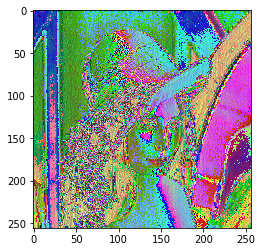

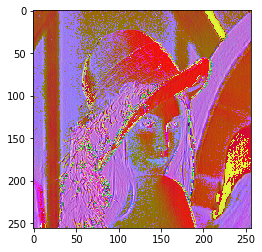

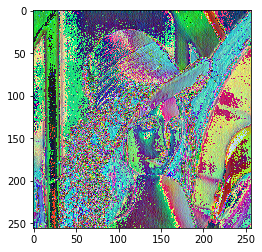

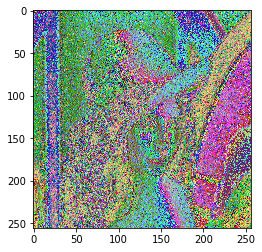

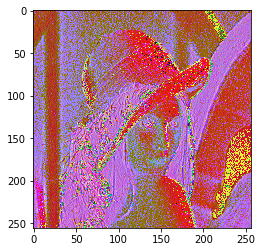

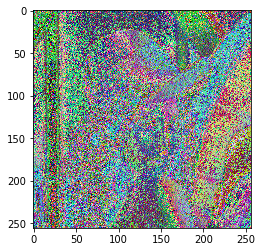

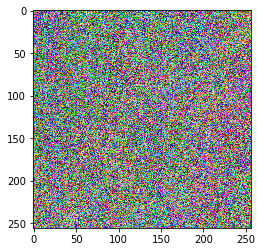

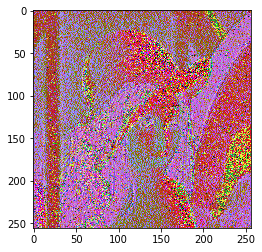

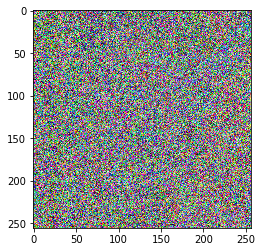

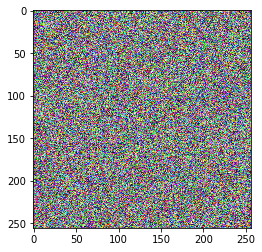

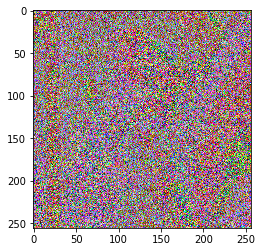

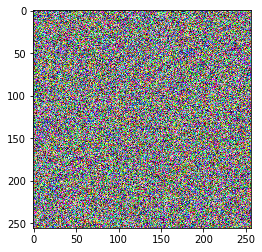

In [106]:
for y in noisy_cs:
    for x in (high_pass1,high_pass2,high_pass3):
        #data = np.array(y, dtype=int)
        lowpass = ndimage.convolve(y, x)
        plt.subplot(111),plt.imshow((lowpass).astype(np.uint8))
        plt.show()

### Question 5

In [107]:
image=Image.open(r"lena_noisy.png")
image_array= np.array(image)

Estimated Gaussian noise standard deviation = 9.564688071177976


C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]
C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future thi

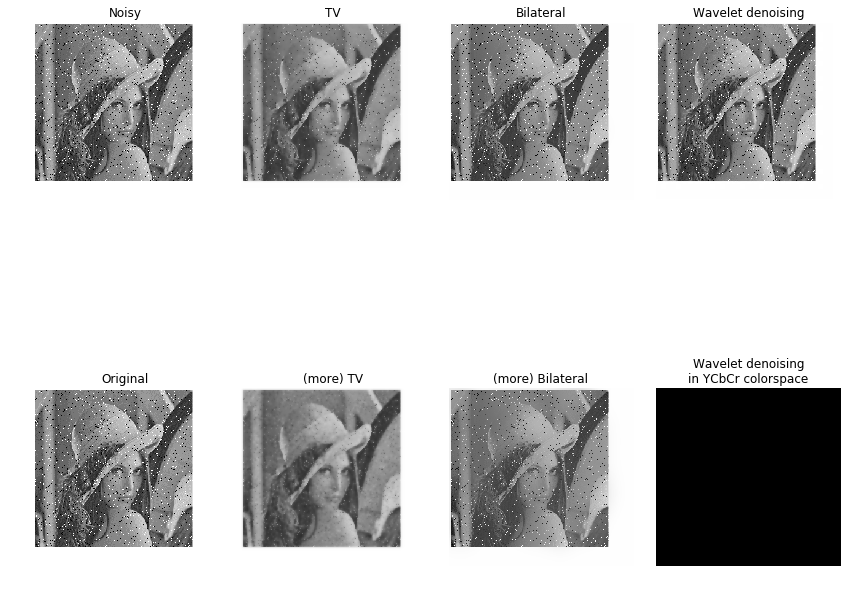

In [143]:
noisy = image_array
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 12),
                       sharex=True, sharey=True)

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(image_array)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()